# Explainability Methods

Machine learning models, especially those dealing with time series data, often operate as complex **black boxes**, making it challenging to interpret their decisions. Explainability methods play a crucial role in demystifying these models and enhancing their trustworthiness.

In this notebook, we'll explore key explainability techniques, implemented in out framework, including SHAP, and Time Series Points Perturbation Analysis.

Before we start with explainability methods, let's train two models: a simple statistical model and a complex one with several preprocessing nodes:

In [7]:
import numpy as np

from fedot_ind.api.main import FedotIndustrial as FI
from fedot_ind.tools.loader import DataLoader
from fedot_ind.tools.explain.explain import PointExplainer

available_operations=['scaling',
                   'normalization',
                   'xgboost',
                   'rfr',
                   'rf',
                   'logit',
                   'mlp',
                   'knn',
                   'lgbm',
                   'pca']

# stat_model = FI(task='ts_classification',
#                 dataset=dataset,
#                 strategy='quantile',
#                 use_cache=False,
#                 timeout=0.1,
#                 n_jobs=-1,
#                 logging_level=50)
#
# topo_model = FI(task='ts_classification',
#                 dataset=dataset,
#                 strategy='topological',
#                 use_cache=False,
#                 timeout=0.1,
#                 n_jobs=-1,
#                 logging_level=50)
#
#
# comp_model = FI(task='ts_classification',
#                 dataset=dataset,
#                 strategy='fedot_preset',
#                 branch_nodes=['eigen_basis', 'fourier_basis'],
#                 tuning_iterations=2,
#                 tuning_timeout=2,
#                 use_cache=False,
#                 timeout=0.1,
#                 n_jobs=-1,
#                 logging_level=50,
#                 available_operations=available_operations)

## Synthetic data

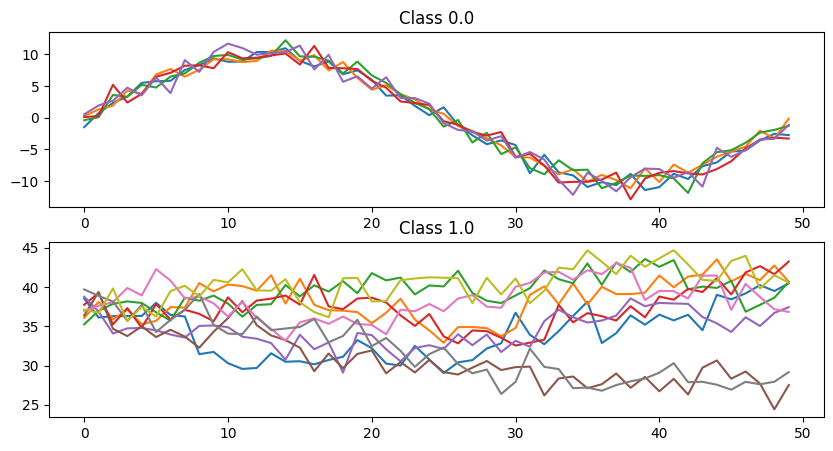

In [3]:
from fedot_ind.tools.synthetic.ts_datasets_generator import TimeSeriesDatasetsGenerator
import matplotlib.pyplot as plt
import numpy as np


generator = TimeSeriesDatasetsGenerator(num_samples=14,
                                        max_ts_len=50,
                                        binary=True)
train_data, test_data = generator.generate_data()
X_test, y_test = test_data
X_train, y_train = train_data

class_1 = np.unique(y_train)[0]
class_2 = np.unique(y_train)[1]
class_1_idx = np.where(y_train == class_1)[0]
class_2_idx = np.where(y_train == class_2)[0]
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].plot(X_train.iloc[class_1_idx, :].T)
axs[0].set_title(f'Class {class_1}')
axs[1].plot(X_train.iloc[class_2_idx, :].T)
axs[1].set_title(f'Class {class_2}')
plt.show()


In [25]:
stat_model.fit(features=X_train, target=y_train)
stat_labels = stat_model.predict(features=X_test, target=y_test)
stat_probs = stat_model.predict_proba(features=X_test, target=y_test)
stat_model.get_metrics(target=y_test, metric_names=['roc_auc'])

{'roc_auc': 1.0}

Processing points: 100%|██████████| 10/10 [00:00<00:00, 12.54point/s]


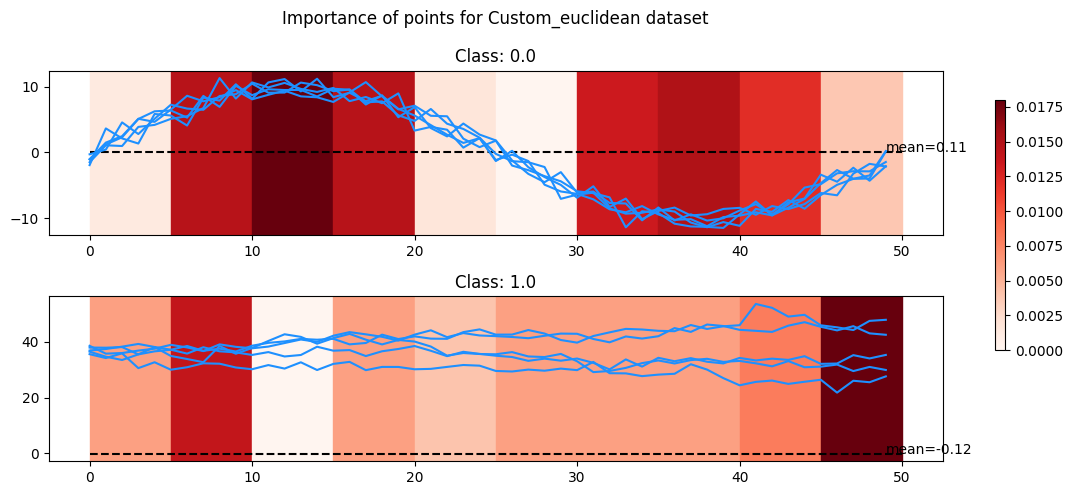

In [26]:


distance = 'euclidean'
explainer = PointExplainer(stat_model, X_test, y_test)
explainer.explain(n_samples=5, window=10, method=distance, name='Custom')
explainer.visual(threshold=0, name='Custom'+'_'+distance)

In [27]:
topo_model.fit(features=X_train, target=y_train)
topo_labels = topo_model.predict(features=X_test, target=y_test)
topo_probs = topo_model.predict_proba(features=X_test, target=y_test)
topo_model.get_metrics(target=y_test, metric_names=['roc_auc'])

{'roc_auc': 0.667}

Processing points: 100%|██████████| 10/10 [00:01<00:00,  7.77point/s]


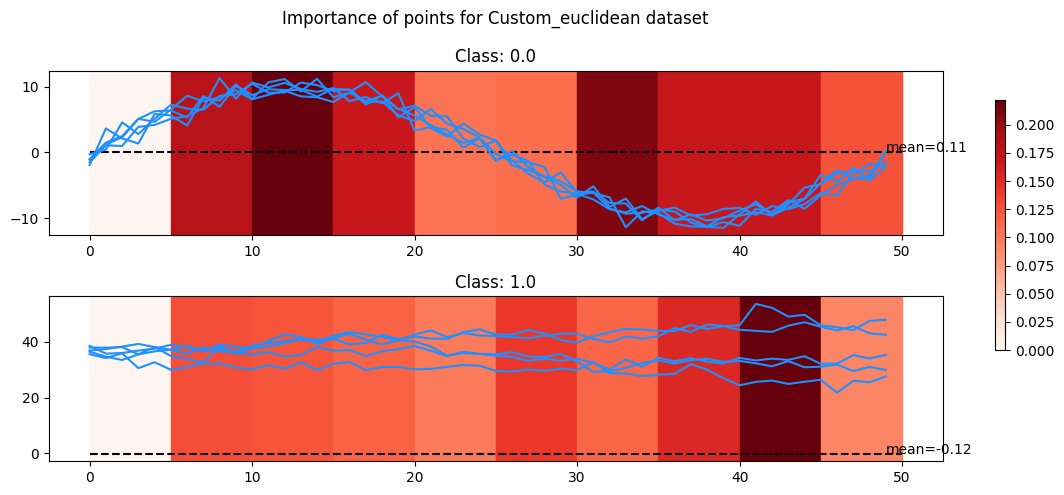

In [28]:
from fedot_ind.tools.explain.explain import PointExplainer

distance = 'euclidean'
explainer = PointExplainer(topo_model, X_test, y_test)
explainer.explain(n_samples=5, window=10, method=distance, name='Custom')
explainer.visual(threshold=0, name='Custom'+'_'+distance)

## Real data

In [1]:
from fedot_ind.api.main import FedotIndustrial as FI
from fedot_ind.tools.loader import DataLoader

dataset = 'Beef'
train_data, test_data = DataLoader(dataset).load_data()

X_test_beef, y_test_beef = test_data
X_train_beef, y_train_beef = train_data

2023-12-14 13:08:38.448636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
stat_model_beef = FI(task='ts_classification',
                dataset='Beef',
                strategy='quantile',
                use_cache=False,
                timeout=0.1,
                n_jobs=-1,
                logging_level=50)

stat_model_beef.fit(features=X_train_beef, target=y_train_beef)
stat_labels_beef = stat_model_beef.predict(features=X_test_beef, target=y_test_beef)
stat_probs_beef = stat_model_beef.predict_proba(features=X_test_beef, target=y_test_beef)
stat_model_beef.get_metrics(target=y_test_beef, metric_names=['f1'])

2023-12-14 13:08:50,860 INFO: FedotIndustrialAPI - Initialising experiment setup
2023-12-14 13:08:50,870 INFO: Configurator - Experiment setup:
2023-12-14 13:08:50,877 INFO: Configurator - task - ts_classification
2023-12-14 13:08:50,883 INFO: Configurator - dataset - Beef
2023-12-14 13:08:50,885 INFO: Configurator - strategy - quantile
2023-12-14 13:08:50,886 INFO: Configurator - use_cache - False
2023-12-14 13:08:50,888 INFO: FedotIndustrialAPI - Initialising solver
2023-12-14 13:08:50,890 INFO: TimeSeriesClassifier - TimeSeriesClassifier initialised
2023-12-14 13:08:50,891 INFO: TimeSeriesClassifier - Fitting model


{'f1': 0.452}

Processing points: 100%|██████████| 10/10 [00:02<00:00,  3.49point/s]


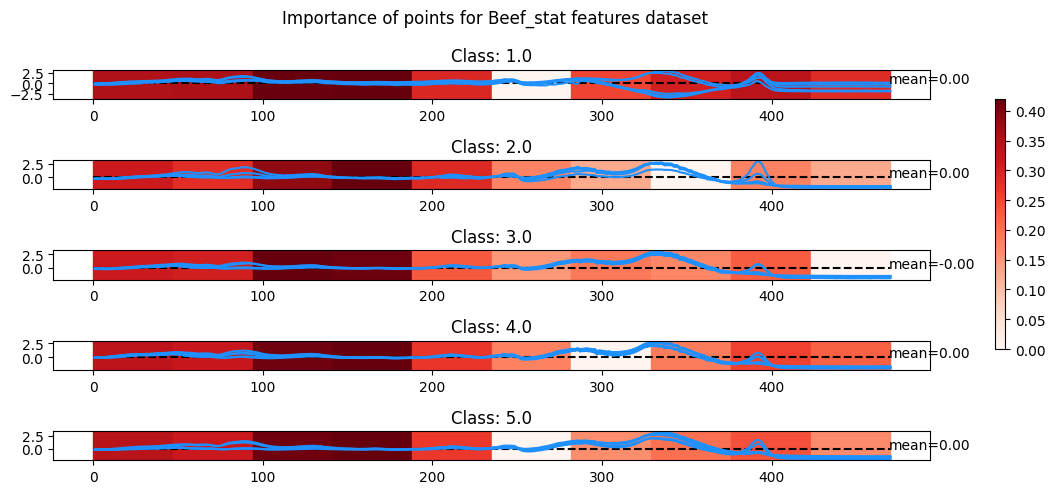

In [17]:
from fedot_ind.tools.explain.explain import PointExplainer

distance = 'euclidean'
explainer_stat_beef = PointExplainer(stat_model_beef, X_test_beef, y_test_beef)
explainer_stat_beef.explain(n_samples=5, window=10, method=distance, name='Beef')
explainer_stat_beef.visual(threshold=0, name='Beef'+'_'+'stat features')

In [7]:
comp_model_beef = FI(task='ts_classification',
                dataset='Beef',
                strategy='fedot_preset',
                branch_nodes=['eigen_basis'],
                tuning_iterations=5,
                tuning_timeout=3,
                use_cache=False,
                timeout=0.1,
                n_jobs=-1,
                logging_level=50,
                available_operations=available_operations)

comp_model_beef.fit(features=X_train_beef, target=y_train_beef)
comp_labels_beef = comp_model_beef.predict(features=X_test_beef, target=y_test_beef)
comp_probs_beef = comp_model_beef.predict_proba(features=X_test_beef, target=y_test_beef)
comp_model_beef.get_metrics(target=y_test_beef, metric_names=['f1'])

100%|██████████| 2/2 [00:11<00:00,  5.85s/trial, best loss: -0.047619047619047616]


{'f1': 0.105}

Processing points: 100%|██████████| 10/10 [00:12<00:00,  1.29s/point]


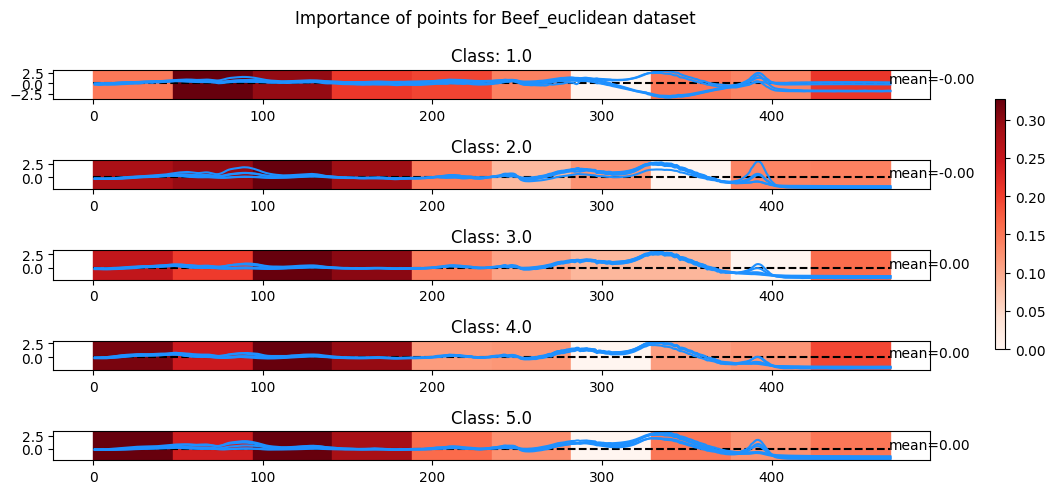

In [8]:
from fedot_ind.tools.explain.explain import PointExplainer

distance = 'euclidean'
explainer_comp_beef = PointExplainer(comp_model_beef, X_test_beef, y_test_beef)
explainer_comp_beef.explain(n_samples=5, window=10, method=distance, name='Beef')
explainer_comp_beef.visual(threshold=0, name='Beef'+'_'+distance)

In [10]:
from fedot_ind.api.main import FedotIndustrial as FI
from fedot_ind.tools.loader import DataLoader

dataset = 'Car'
train_data, test_data = DataLoader(dataset).load_data()
available_operations_=['scaling',
                   'normalization',
                   'xgboost',
                   'rfr',
                   # 'rf',
                   'logit',
                   'mlp',
                   'knn',
                   'lgbm',
                   'pca']

X_test_car, y_test_car = test_data
X_train_car, y_train_car = train_data

stat_model_car = FI(task='ts_classification',
                dataset='Car',
                strategy='quantile',
                use_cache=False,
                timeout=0.1,
                n_jobs=-1,
                logging_level=50,
                available_operations=available_operations_)

stat_model_car.fit(features=X_train_car, target=y_train_car)
stat_labels_car = stat_model_car.predict(features=X_test_car, target=y_test_car)
stat_probs_car = stat_model_car.predict_proba(features=X_test_car, target=y_test_car)
stat_model_car.get_metrics(target=y_test_car, metric_names=['f1'])

{'f1': 0.705}

Processing points: 100%|██████████| 10/10 [00:02<00:00,  3.39point/s]


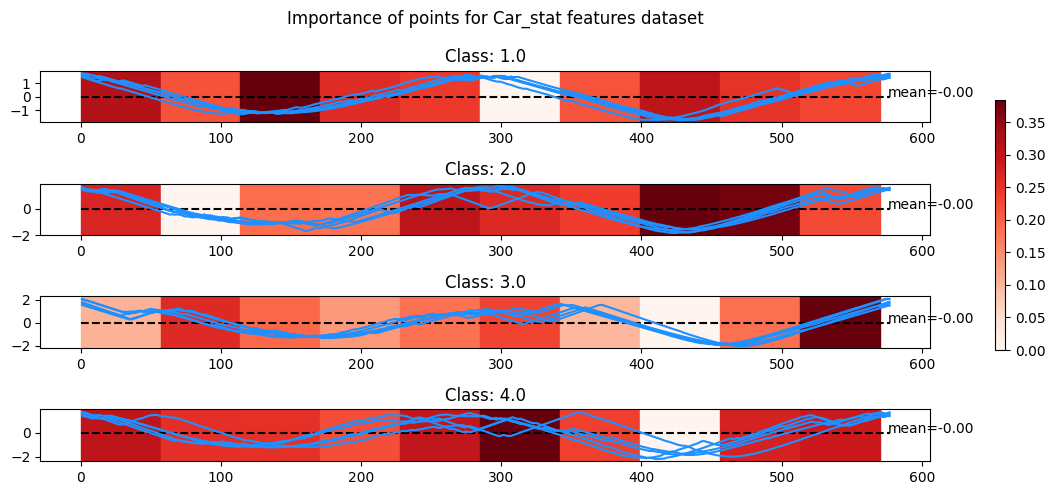

In [11]:
explainer_stat_car = PointExplainer(stat_model_car, X_test_car, y_test_car)
explainer_stat_car.explain(n_samples=5, window=10, method='euclidean', name='Car')
explainer_stat_car.visual(threshold=0, name='Car'+'_'+'stat features')

In [22]:
train_data, test_data = DataLoader('Car').load_data()
available_operations_=['scaling',
                   'normalization',
                   'xgboost',
                   'rfr',
                   # 'rf',
                   'logit',
                   'mlp',
                   'knn',
                   'lgbm',
                   'pca']

X_test_car, y_test_car = test_data
X_train_car, y_train_car = train_data
comp_model_car = FI(task='ts_classification',
                dataset='Car',
                strategy='fedot_preset',
                branch_nodes=['eigen_basis'],
                tuning_iterations=5,
                tuning_timeout=3,
                use_cache=False,
                timeout=0.1,
                n_jobs=-1,
                logging_level=50,
                available_operations=available_operations_)

comp_model_car.fit(features=X_train_car, target=y_train_car)
comp_labels_car = comp_model_car.predict(features=X_test_car, target=y_test_car)
comp_probs_car = comp_model_car.predict_proba(features=X_test_car, target=y_test_car)
comp_model_car.get_metrics(target=y_test_car, metric_names=['f1'])

100%|██████████| 2/2 [00:17<00:00,  8.82s/trial, best loss: -0.912962962962963]


{'f1': 0.849}

Processing points: 100%|██████████| 10/10 [00:25<00:00,  2.58s/point]


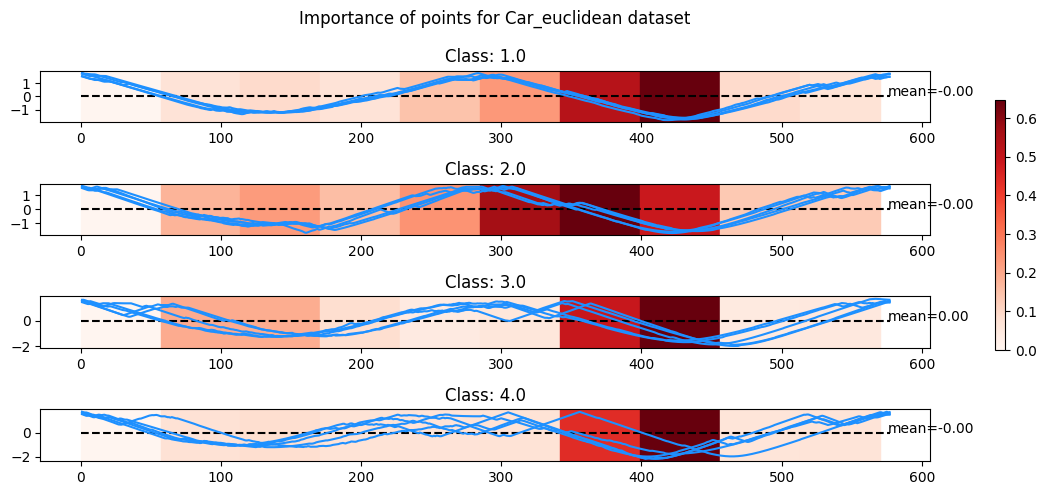

In [26]:
explainer_comp_car = PointExplainer(comp_model_car, X_test_car, y_test_car)
explainer_comp_car.explain(n_samples=5, window=10, method='euclidean', name='Car')
explainer_comp_car.visual(threshold=0, name='Car'+'_'+'euclidean')

In [27]:
explainer_comp_car.window_length

57

In [42]:
left = 228
right = 456

train_data, test_data = DataLoader('Car').load_data()
X_test_car_short, y_test_car = test_data[0].iloc[:, left:right], test_data[1]
X_train_car_short, y_train_car = train_data[0].iloc[:, left:right], train_data[1]

X_test_car_short.columns = np.arange(0, X_test_car_short.shape[1])
X_train_car_short.columns = np.arange(0, X_train_car_short.shape[1])


comp_model_car_short = FI(task='ts_classification',
                dataset='Car',
                strategy='quantile',
                window_size=10,
                # strategy='fedot_preset',
                # branch_nodes=['eigen_basis'],
                # tuning_iterations=5,
                # tuning_timeout=3,
                use_cache=False,
                timeout=1,
                n_jobs=-1,
                logging_level=50,
                available_operations=available_operations_)

comp_model_car_short.fit(features=X_train_car_short, target=y_train_car)
comp_labels_car_short = comp_model_car_short.predict(features=X_test_car_short, target=y_test_car)
comp_probs_car_short = comp_model_car_short.predict_proba(features=X_test_car_short, target=y_test_car)
comp_model_car_short.get_metrics(target=y_test_car, metric_names=['f1'])

Generations:   0%|          | 1/10000 [01:04<?, ?gen/s]


{'f1': 0.756}

In [44]:
comp_model_car_short.solver.test_features.shape

(60, 640)

Processing points: 100%|██████████| 10/10 [00:07<00:00,  1.34point/s]


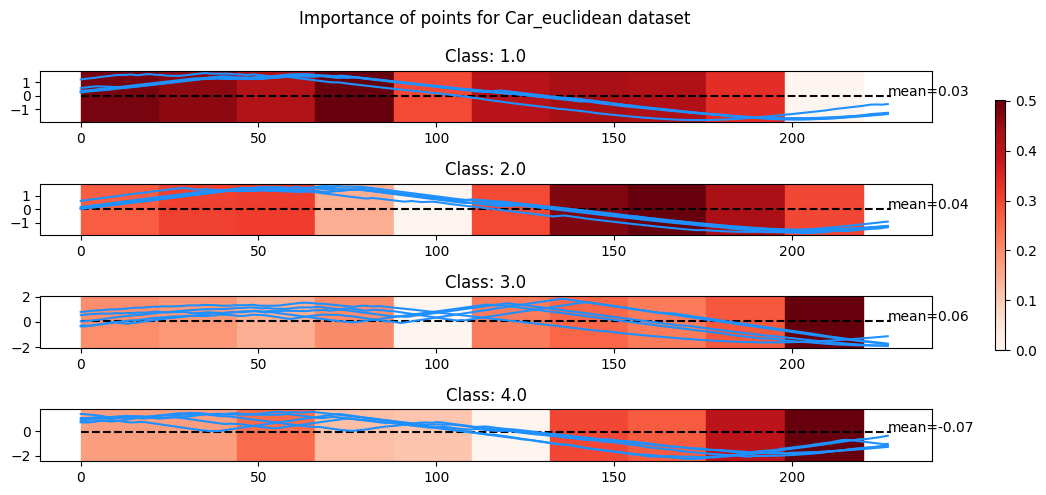

In [45]:
explainer_comp_car_short = PointExplainer(comp_model_car_short, X_test_car_short, y_test_car)
explainer_comp_car_short.explain(n_samples=5, window=10, method='euclidean', name='Car')
explainer_comp_car_short.visual(threshold=0, name='Car'+'_'+'euclidean')

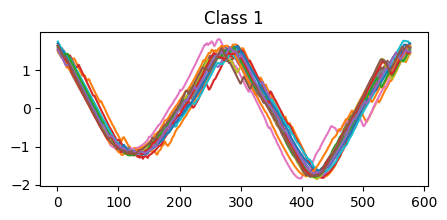

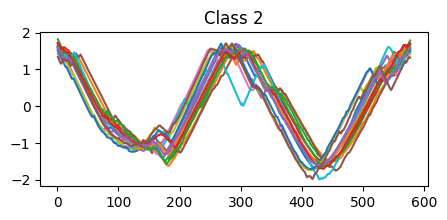

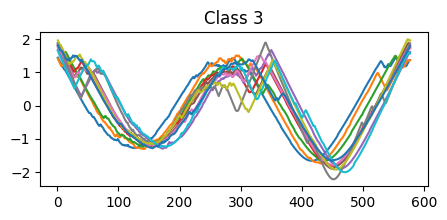

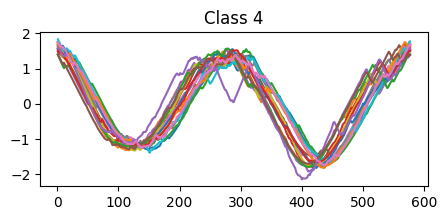

In [20]:
import numpy as np
import matplotlib.pyplot as plt
car_classes = np.unique(y_train_car)

for cls in car_classes:
    cls_idx = np.where(y_train_car == cls)[0]
    X_train_car.iloc[cls_idx, :].T.plot(figsize=(5,2), title=f'Class {cls}', legend=None)
    plt.show()

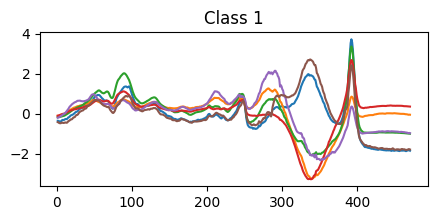

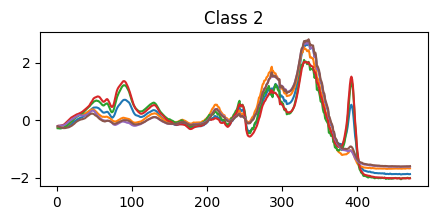

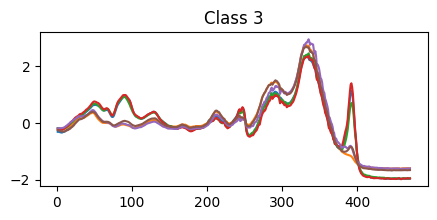

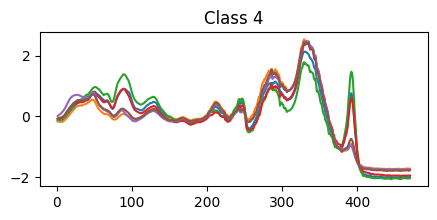

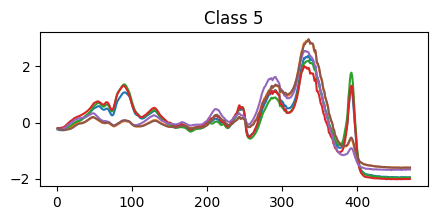

In [16]:
import numpy as np
import matplotlib.pyplot as plt
beef_classes = np.unique(y_train_beef)

for cls in beef_classes:
    cls_idx = np.where(y_train_beef == cls)[0]
    X_train_beef.iloc[cls_idx, :].T.plot(figsize=(5,2), title=f'Class {cls}', legend=None)
    plt.show()

<Axes: >

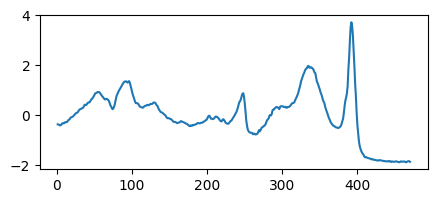

In [71]:
dataset = 'Beef'
train_data, test_data = DataLoader(dataset).load_data()

X_test_beef, y_test_beef = test_data
X_train_beef, y_train_beef = train_data

ts = X_train_beef.iloc[0, :].copy()
ts.plot(figsize=(5,2))

<Axes: >

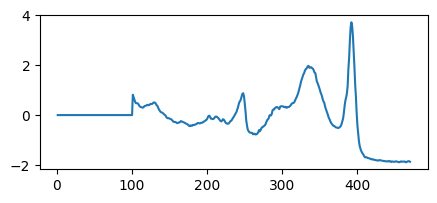

In [64]:
ts[0:100] = np.mean(ts)
ts.plot(figsize=(5,2))

<Axes: >

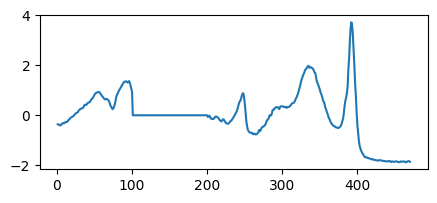

In [69]:
ts[100:200] = np.mean(ts)
ts.plot(figsize=(5,2))

<Axes: >

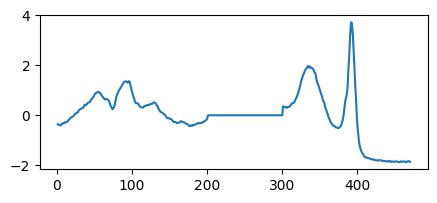

In [72]:
ts[200:300] = np.mean(ts)
ts.plot(figsize=(5,2))

## SHAP (SHapley Additive exPlanations)

SHAP values offer a game-theoretic approach to assign a value to each feature's contribution to a model's prediction.
In the context of time series, SHAP values can be calculated for individual time points or across the entire sequence. The formula for calculating SHAP values is given by:

$$\phi_i(f) = \sum_{S \subseteq N \setminus \{i\}} \frac{{|S| - 1}! \cdot (|N| - |S| - 1)!}{|N|!} [f(S \cup \{i\}) - f(S)] $$

where:

- $f(S)$ is the model's output when considering only the features in set $S$,
- $N$ is the set of all features, and
- $i$ is the feature for which we are calculating the SHAP value.


In our case for statistical model we can explore SHAP values for each feature, extracted by QuantileExtractor. Here they are:

In [4]:
display(stat_model.solver.test_features)

,skewness_,kurtosis_,n_peaks_,slope_,ben_corr_,interquartile_range_,energy_,cross_rate_,autocorrelation_,shannon_entropy_,...,petrosian_fractal_dimension_,mean_,median_,std_,max_,min_,q5_,q25_,q75_,q95_
0,-0.350659,0.361394,51.0,-0.003248,0.959372,0.704565,0.997872,0.029787,0.994638,8.842474,...,0.622998,-7.765958e-10,0.140019,0.998936,2.448200,-1.943663,-1.907868,-0.192094,0.512471,1.578451
1,-2.003292,3.390948,40.0,-0.002255,0.746639,0.308500,0.997872,0.004255,0.998845,8.872262,...,0.638446,-3.636170e-10,0.280685,0.998936,1.385611,-3.343694,-2.729292,0.124506,0.433006,0.997197
2,-1.304637,1.929469,29.0,-0.003378,0.762244,0.779684,0.997872,0.008511,0.997295,8.876517,...,0.659993,5.757447e-10,0.230815,0.998936,2.459545,-3.018348,-2.478581,-0.230480,0.549203,1.248810
3,-0.692359,0.099559,32.0,-0.004400,0.832135,1.423033,0.997872,0.012766,0.996090,8.859496,...,0.653261,4.687022e-10,0.224913,0.998936,2.368445,-2.495473,-2.162264,-0.761656,0.661378,1.299882
4,-2.138024,3.671746,36.0,-0.002453,0.801914,0.386153,0.997872,0.004255,0.998477,8.872262,...,0.645365,2.723404e-10,0.314075,0.998936,1.294925,-3.385794,-2.745254,0.116988,0.503141,0.827501
5,0.382660,0.956841,63.0,-0.001735,0.989721,0.800253,0.997872,0.021277,0.994082,8.842474,...,0.609642,6.080851e-10,-0.064324,0.998936,2.914151,-1.814624,-1.751914,-0.357905,0.442348,1.899067
6,-0.146153,0.529319,46.0,-0.002617,0.986619,0.722207,0.997872,0.029787,0.994770,8.876517,...,0.628114,-6.553192e-10,0.091592,0.998936,2.576844,-1.909445,-1.892857,-0.251989,0.470217,1.706002
7,0.196881,0.330647,45.0,-0.002130,0.950238,0.475943,0.997872,0.004255,0.996540,8.872262,...,0.629474,-7.325529e-11,0.037003,0.998936,2.628389,-1.707133,-1.692649,-0.205631,0.270312,1.797096
8,-0.382352,0.217829,37.0,-0.003067,0.986553,0.703411,0.997872,0.025532,0.994737,8.876517,...,0.643553,3.458724e-10,0.142964,0.998936,2.379456,-1.945312,-1.925808,-0.227364,0.476047,1.512839
9,-0.361481,0.220714,32.0,-0.003797,0.943681,0.858828,0.997872,0.025532,0.991820,8.855240,...,0.652212,-1.710638e-10,0.061785,0.998936,2.970318,-1.946811,-1.933601,-0.273775,0.585053,1.458842


In [5]:
stat_model.solver.test_features.shape

(30, 28)

In [6]:
stat_model.explain(method='shap', n_samples=5)

TypeError: explain() missing 1 required positional argument: 'self'

## Time Series Points Perturbation Analysis

Perturbation analysis involves systematically perturbing features and observing the impact on predictions. In time series, this can be applied by introducing small changes to the input features at each time point and monitoring the resulting variations in the model output. By quantifying the sensitivity of the model to perturbations, insights into feature importance and model behavior can be gained.

Processing points: 100%|██████████| 10/10 [00:13<00:00,  1.31s/point]


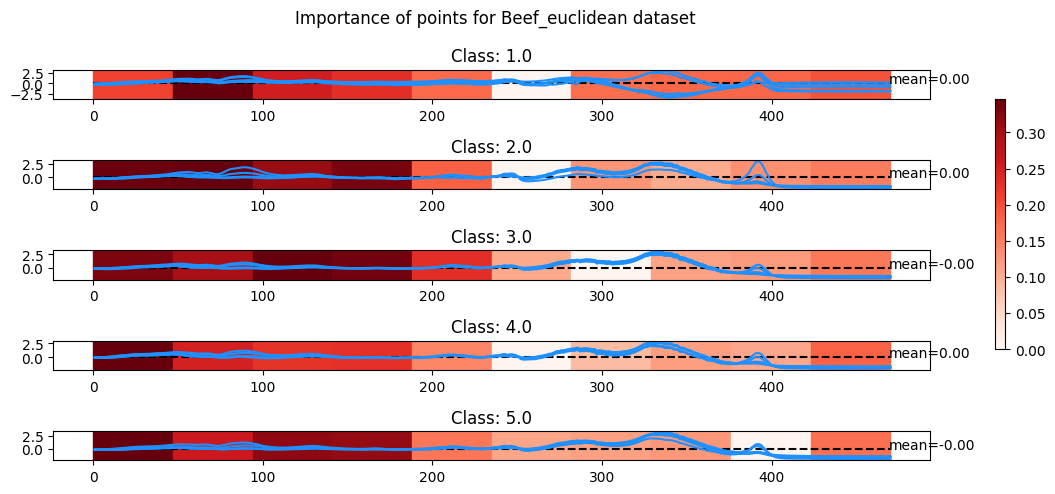

In [35]:
from fedot_ind.tools.explain.explain import PointExplainer

distance = 'euclidean'
explainer = PointExplainer(comp_model, X_test, y_test)
explainer.explain(n_samples=5, window=10, method=distance, name=dataset)
explainer.visual(threshold=0, name=dataset+'_'+distance)

Processing points: 100%|██████████| 10/10 [00:00<00:00, 10.32point/s]


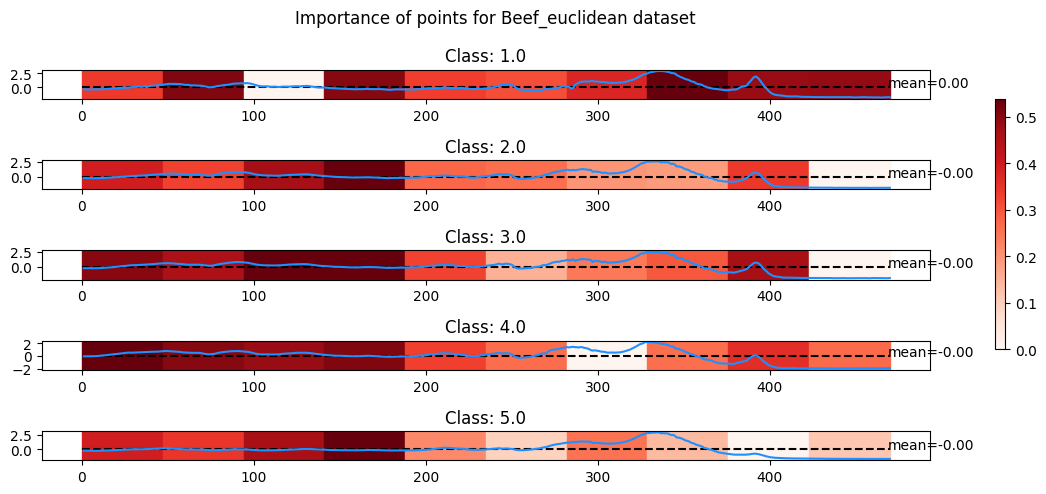

In [34]:
distance = 'euclidean'
explainer = PointExplainer(stat_model, X_test, y_test)
explainer.explain(n_samples=1, window=10, method=distance, name=dataset)
explainer.visual(threshold=0, name=dataset+'_'+distance)

Processing points: 100%|██████████| 10/10 [00:01<00:00,  8.87point/s]


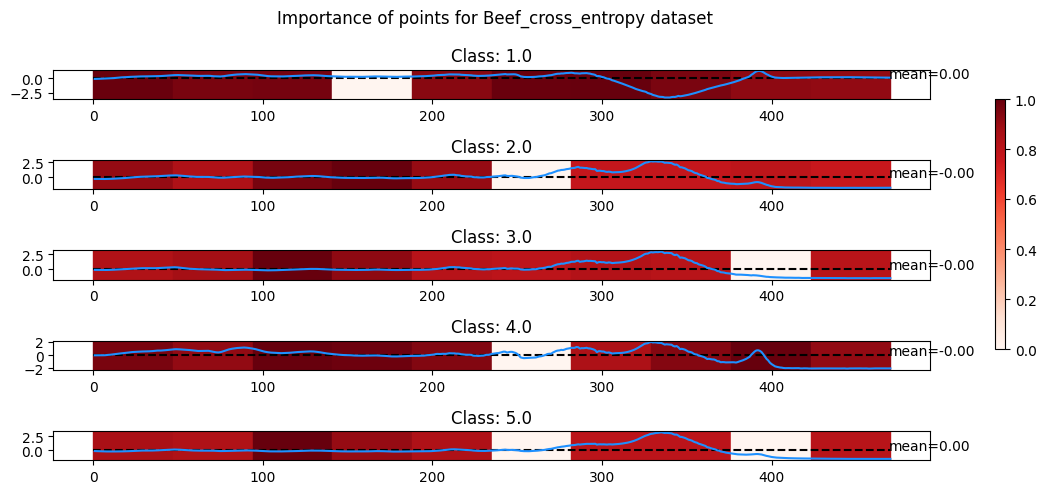

In [13]:
distance = 'cross_entropy'
explainer = PointExplainer(stat_model, X_test, y_test)
explainer.explain(n_samples=1, window=10, method=distance, name=dataset)
explainer.visual(threshold=0, name=dataset+'_'+distance)

Processing points: 100%|██████████| 10/10 [00:03<00:00,  2.58point/s]


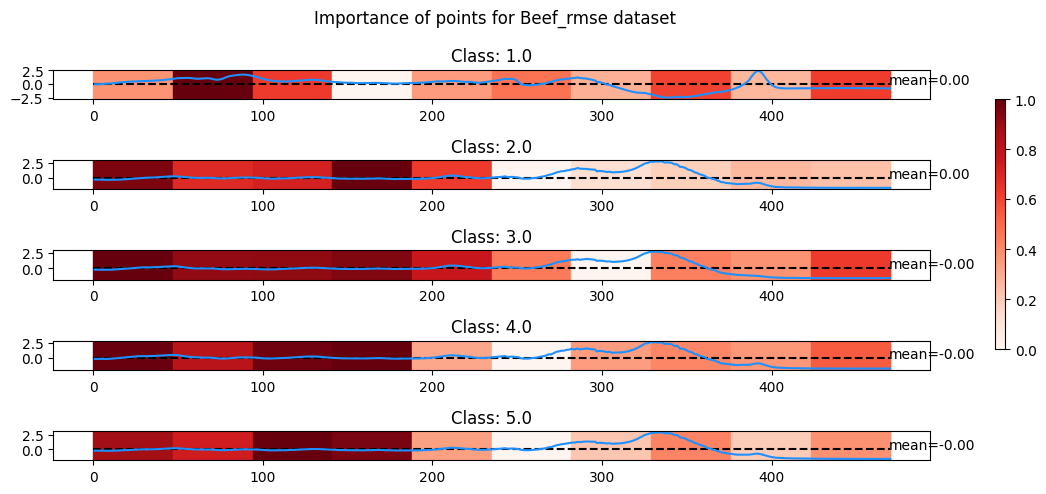

In [11]:
distance = 'rmse'
explainer = PointExplainer(comp_model, X_test, y_test)
explainer.explain(n_samples=1, window=10, method=distance, name=dataset)
explainer.visual(threshold=0, name=dataset+'_'+distance)

Processing points: 100%|██████████| 10/10 [00:03<00:00,  2.85point/s]


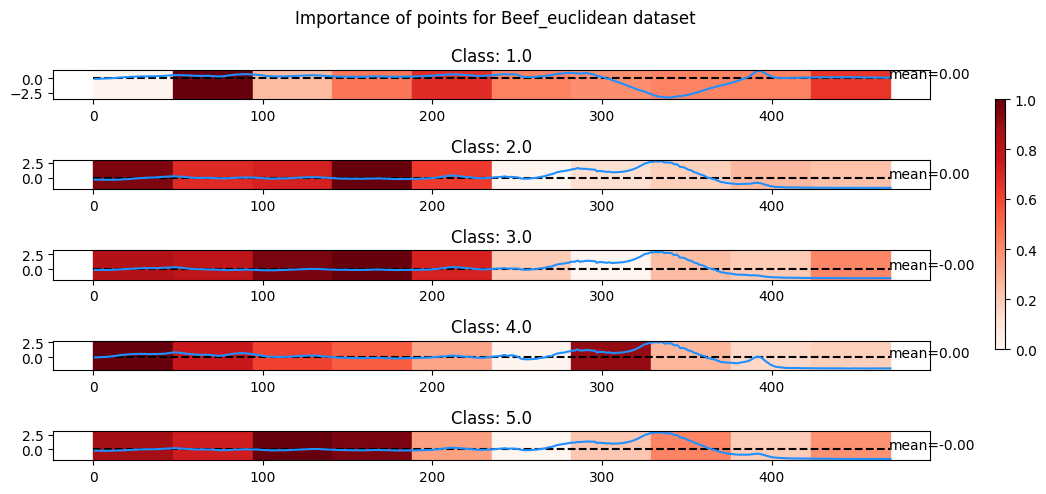

In [12]:
distance = 'euclidean'
explainer = PointExplainer(comp_model, X_test, y_test)
explainer.explain(n_samples=1, window=10, method=distance, name=dataset)
explainer.visual(threshold=0, name=dataset+'_'+distance)